In [ ]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots

In [ ]:
class ModelTask2(nn.Module):

    def __init__(self,
                 image_channels,
                 num_classes):
        """
            Is called when model is initialized.
            Args:

                image_channels. Number of color channels in image (3)
                num_classes: Number of classes we want to predict (10)
        """



        super().__init__()
        # TODO: Implement this function (Task  2a)

        self.num_classes = num_classes
        # Define the convolutional layers
        self.feature_extractor = nn.Sequential( # The output of feature_extractor_1 will be [batch_size, num_filters, 16, 16]            #Layer1
            #Layer 1
            nn.Conv2d(
                in_channels=3,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #Layer 2
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #Layer 3
            nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
        )
        
        #Fully connected below
        self.fc = nn.Sequential(
            nn.Linear(128*4*4, 64), #after 3 maxpools where each halves "x-y" dimensions
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64, 10),
        )

        self.num_output_features = 32*32*32
        # Initialize our last fully connected layer
        # Inputs all extracted features from the convolutional layers
        # Outputs num_classes predictions, 1 for each class.
        # There is no need for softmax activation function, as this is
        # included with nn.CrossEntropyLoss
       

    def forward(self, x):
        """
        Performs a forward pass through the model
        Args:
            x: Input image, shape: [batch_size, 3, 32, 32]
        """
        # TODO: Implement this function (Task  2a)
        batch_size = x.shape[0]
        out = x
        expected_shape = (batch_size, self.num_classes)
        out = self.feature_extractor(out)
        out = out.view(batch_size, -1)
        out = self.fc(out)  
        
        
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out

In [ ]:
epochs = 10
batch_size = 64
learning_rate = 5e-2 # Should be 5e-5 for LeNet
early_stop_count = 7
dataloaders = load_cifar10(batch_size)
model_1 = ModelTask2(image_channels=3, num_classes=10)
trainer_1 = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model_1,
    dataloaders,
)
trainer_1.train()

Extracting data/cifar10/cifar-10-python.tar.gz to data/cifar10
Files already downloaded and verified


  0%|          | 0/10 [00:00<?, ?it/s]

ModelTask2(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=2048, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
  (classifier): Sequential(
    (0): Linear(in_features=2048, out_features=64, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, trac

 10%|█         | 1/10 [00:18<02:50, 18.90s/it]

Epoch: 0, Batches per seconds: 37.24, Global step:    702, Validation Loss: 1.05, Validation Accuracy: 0.627
Epoch: 1, Batches per seconds: 37.16, Global step:   1053, Validation Loss: 0.92, Validation Accuracy: 0.683


 20%|██        | 2/10 [00:37<02:30, 18.85s/it]

Epoch: 1, Batches per seconds: 37.38, Global step:   1404, Validation Loss: 0.97, Validation Accuracy: 0.664
Epoch: 2, Batches per seconds: 37.25, Global step:   1755, Validation Loss: 0.98, Validation Accuracy: 0.672


 30%|███       | 3/10 [00:56<02:12, 18.89s/it]

Epoch: 2, Batches per seconds: 37.24, Global step:   2106, Validation Loss: 0.90, Validation Accuracy: 0.686
Epoch: 3, Batches per seconds: 37.24, Global step:   2457, Validation Loss: 0.78, Validation Accuracy: 0.732


 40%|████      | 4/10 [01:15<01:53, 18.85s/it]

Epoch: 3, Batches per seconds: 37.31, Global step:   2808, Validation Loss: 0.92, Validation Accuracy: 0.690
Epoch: 4, Batches per seconds: 37.23, Global step:   3159, Validation Loss: 0.84, Validation Accuracy: 0.723


 50%|█████     | 5/10 [01:34<01:34, 18.85s/it]

Epoch: 4, Batches per seconds: 37.30, Global step:   3510, Validation Loss: 0.77, Validation Accuracy: 0.734
Epoch: 5, Batches per seconds: 37.25, Global step:   3861, Validation Loss: 0.80, Validation Accuracy: 0.738


 60%|██████    | 6/10 [01:53<01:15, 18.84s/it]

Epoch: 5, Batches per seconds: 37.31, Global step:   4212, Validation Loss: 0.75, Validation Accuracy: 0.748
Epoch: 6, Batches per seconds: 37.29, Global step:   4563, Validation Loss: 0.78, Validation Accuracy: 0.740


 70%|███████   | 7/10 [02:11<00:56, 18.83s/it]

Epoch: 6, Batches per seconds: 37.32, Global step:   4914, Validation Loss: 0.79, Validation Accuracy: 0.740
Epoch: 7, Batches per seconds: 37.26, Global step:   5265, Validation Loss: 0.84, Validation Accuracy: 0.735


 80%|████████  | 8/10 [02:30<00:37, 18.85s/it]

Epoch: 7, Batches per seconds: 37.30, Global step:   5616, Validation Loss: 0.80, Validation Accuracy: 0.748
Epoch: 8, Batches per seconds: 37.28, Global step:   5967, Validation Loss: 0.83, Validation Accuracy: 0.747
Epoch: 8, Batches per seconds: 37.32, Global step:   6318, Validation Loss: 0.86, Validation Accuracy: 0.746
Early stop criteria met
Early stopping.


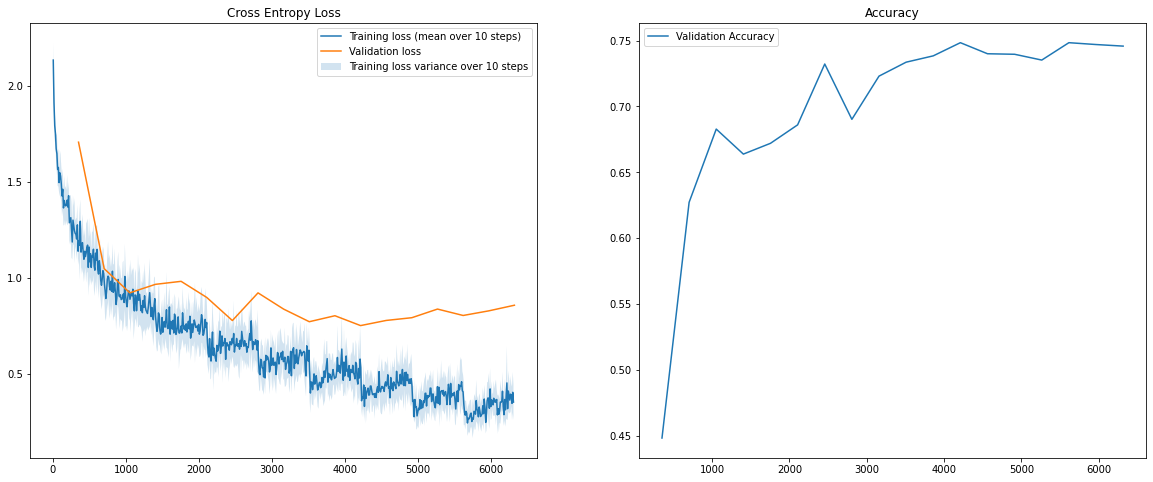

In [ ]:
create_plots(trainer_1, "task2")

In [ ]:
trainer_1.load_best_model()
test_set = trainer_1.dataloader_test
val_set = trainer_1.dataloader_val
train_set = trainer_1.dataloader_train

#create_plots(trainer, "task2_1")
print(compute_loss_and_accuracy(dataloader=test_set,model = model_1, loss_criterion=nn.CrossEntropyLoss()))
print(compute_loss_and_accuracy(dataloader=val_set,model = model_1, loss_criterion=nn.CrossEntropyLoss()))

(tensor(0.7825, device='cuda:0'), 0.7426)
(tensor(0.7520, device='cuda:0'), 0.7544)
